In [1]:
%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
import math
import numpy as np
import pandas as pd
import pydotplus
from scipy import stats
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from IPython.display import Image
import imblearn

In [2]:
df = pd.read_csv("Dataunderstandind.csv")
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition_numerical
0,0,52.0,No,Travel_Rarely,Research & Development,9,4,Medical,2,Male,...,No,17,3.0,3,0,2.0,2,8.0,7,0
1,1,36.0,No,Travel_Rarely,Research & Development,1,1,Life Sciences,2,Male,...,Yes,14,3.0,3,1,3.0,3,1.0,8,0
2,2,46.0,No,Travel_Frequently,Sales,16,3,Life Sciences,3,Male,...,Yes,25,3.0,3,1,4.0,3,1.0,5,0
3,3,33.0,No,Travel_Rarely,Research & Development,5,4,Technical Degree,2,Male,...,No,14,3.0,2,0,1.0,3,3.0,7,0
4,4,37.0,No,Travel_Rarely,Research & Development,9,2,Life Sciences,3,Female,...,No,12,3.0,3,0,2.0,3,10.0,2,0


In [3]:
df.dtypes

Unnamed: 0                    int64
Age                         float64
Attrition                    object
BusinessTravel               object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole            int64
Attrition_numerical           int64
dtype: object

In [4]:
del (df['Unnamed: 0'])

In [5]:
label_encoders = dict()
column2encode = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                 'OverTime']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition_numerical
0,52.0,No,2,1,9,4,3,2,1,3,...,0,17,3.0,3,0,2.0,2,8.0,7,0
1,36.0,No,2,1,1,1,1,2,1,3,...,1,14,3.0,3,1,3.0,3,1.0,8,0
2,46.0,No,1,2,16,3,1,3,1,3,...,1,25,3.0,3,1,4.0,3,1.0,5,0
3,33.0,No,2,1,5,4,5,2,1,3,...,0,14,3.0,2,0,1.0,3,3.0,7,0
4,37.0,No,2,1,9,2,1,3,0,3,...,0,12,3.0,3,0,2.0,3,10.0,2,0


In [7]:
del (df['Attrition_numerical'])

In [8]:
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel                int32
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole            int64
dtype: object

In [9]:
df['Age_bin_round'] = np.array(np.floor(np.array(df['Age']) / 10.))
df[[ 'Age', 'Age_bin_round']].iloc[1071:1076]

,Age,Age_bin_round
1071,33.0,3.0
1072,39.0,3.0
1073,25.0,2.0
1074,41.0,4.0
1075,33.0,3.0


In [10]:
df['Income_bin_round'] = np.array(np.floor(np.array(df['MonthlyIncome']) / 1000.))
df[[ 'MonthlyIncome', 'Income_bin_round']].iloc[1071:1076]

,MonthlyIncome,Income_bin_round
1071,9980.0,9.0
1072,2024.0,2.0
1073,13525.0,13.0
1074,10920.0,10.0
1075,3591.0,3.0


In [11]:
del (df['Age'])
del (df['MonthlyIncome'])
del (df['JobRole'])

# Train -Test

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy='majority')
oversample = RandomOverSampler(sampling_strategy=0.5)

In [13]:
attributes = [col for col in df.columns if col != 'Attrition']

X_or = df[attributes].values
y_or = df['Attrition']






X_train_or, X_test, y_train_or, y_test = train_test_split(X_or, y_or, test_size = 0.2, stratify= y_or, 
                                                          random_state = 100 ) #because it is a random split

X_over, y_over = oversample.fit_resample(X_train_or, y_train_or)
X, y = undersample.fit_resample(X_over, y_over)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, 
                                                  random_state= 100, stratify = y) #viene creato un validation set



print(X_train_or.shape)
print (X_test.shape)
print(X_train.shape)
print(X_val.shape)
print('X iniziale: ', X_train_or.shape, '\n y iniziale: ', Counter(y_train_or))
print('X over: ', X_over.shape, '\n y over: ', Counter(y_over))
print('X: ', X.shape, '\n y: ', Counter(y))


(1148, 23)
(288, 23)
(718, 23)
(240, 23)
X iniziale:  (1148, 23) 
 y iniziale:  Counter({'No': 959, 'Yes': 189})
X over:  (1438, 23) 
 y over:  Counter({'No': 959, 'Yes': 479})
X:  (958, 23) 
 y:  Counter({'No': 479, 'Yes': 479})


# Decision tree - build model

In [15]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [16]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=50, cv=4)
random_search.fit(X_train_or, y_train_or)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.847 (std: 0.017)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': None}

Model with rank: 1
Mean validation score: 0.847 (std: 0.017)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 13}

Model with rank: 3
Mean validation score: 0.846 (std: 0.018)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 30, 'max_depth': 9}

Model with rank: 3
Mean validation score: 0.846 (std: 0.018)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 30, 'max_depth': 8}

Model with rank: 3
Mean validation score: 0.846 (std: 0.018)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 30, 'max_depth': 8}



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [18]:
param_list = {'min_samples_split': [2, 5, 10, 20, 30],
              'min_samples_leaf': [1, 5, 10, 20, 30],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=4)
grid_search.fit(X_train_or, y_train_or)
clf = grid_search.best_estimator_

In [19]:
report(grid_search.cv_results_, n_top=2)

Model with rank: 1
Mean validation score: 0.847 (std: 0.017)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.847 (std: 0.017)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.847 (std: 0.017)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.847 (std: 0.017)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.847 (std: 0.017)
Parameters: {'min_samples_leaf': 20, 'min_samples_split': 30}



In [20]:
grid_search.best_estimator_

DecisionTreeClassifier(min_samples_leaf=20)

In [21]:
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth =8, min_samples_split = 2, min_samples_leaf = 20) 
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20)

feature_importances_: The feature importances. The higher, the more important the feature 

In [22]:
for col, imp in zip(attributes, clf_dt.feature_importances_):
    print(col, imp)

BusinessTravel 0.0
Department 0.13769321862952486
DistanceFromHome 0.07518139589560632
Education 0.0
EducationField 0.0
EnvironmentSatisfaction 0.053293122118614845
Gender 0.0
JobInvolvement 0.0
JobLevel 0.09110715664501338
JobSatisfaction 0.09079692226899497
MaritalStatus 0.0
NumCompaniesWorked 0.02515142975050681
OverTime 0.24781255556930645
PercentSalaryHike 0.006442562026860351
PerformanceRating 0.0
RelationshipSatisfaction 0.008802372605512589
StockOptionLevel 0.07336908871032037
TrainingTimesLastYear 0.0
WorkLifeBalance 0.025002650750162135
YearsAtCompany 0.04548795812661284
YearsInCurrentRole 0.08856343599804203
Age_bin_round 0.025981344820661927
Income_bin_round 0.005314786084260103


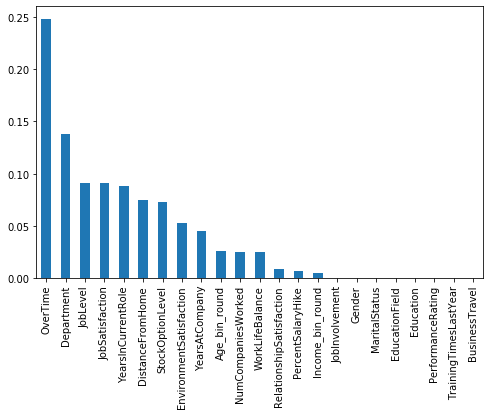

In [23]:
pd.Series(clf_dt.feature_importances_,  
         index = attributes).sort_values(ascending = False).plot(kind = 'bar', figsize = (8,5)); 

Visualize the decision tree 

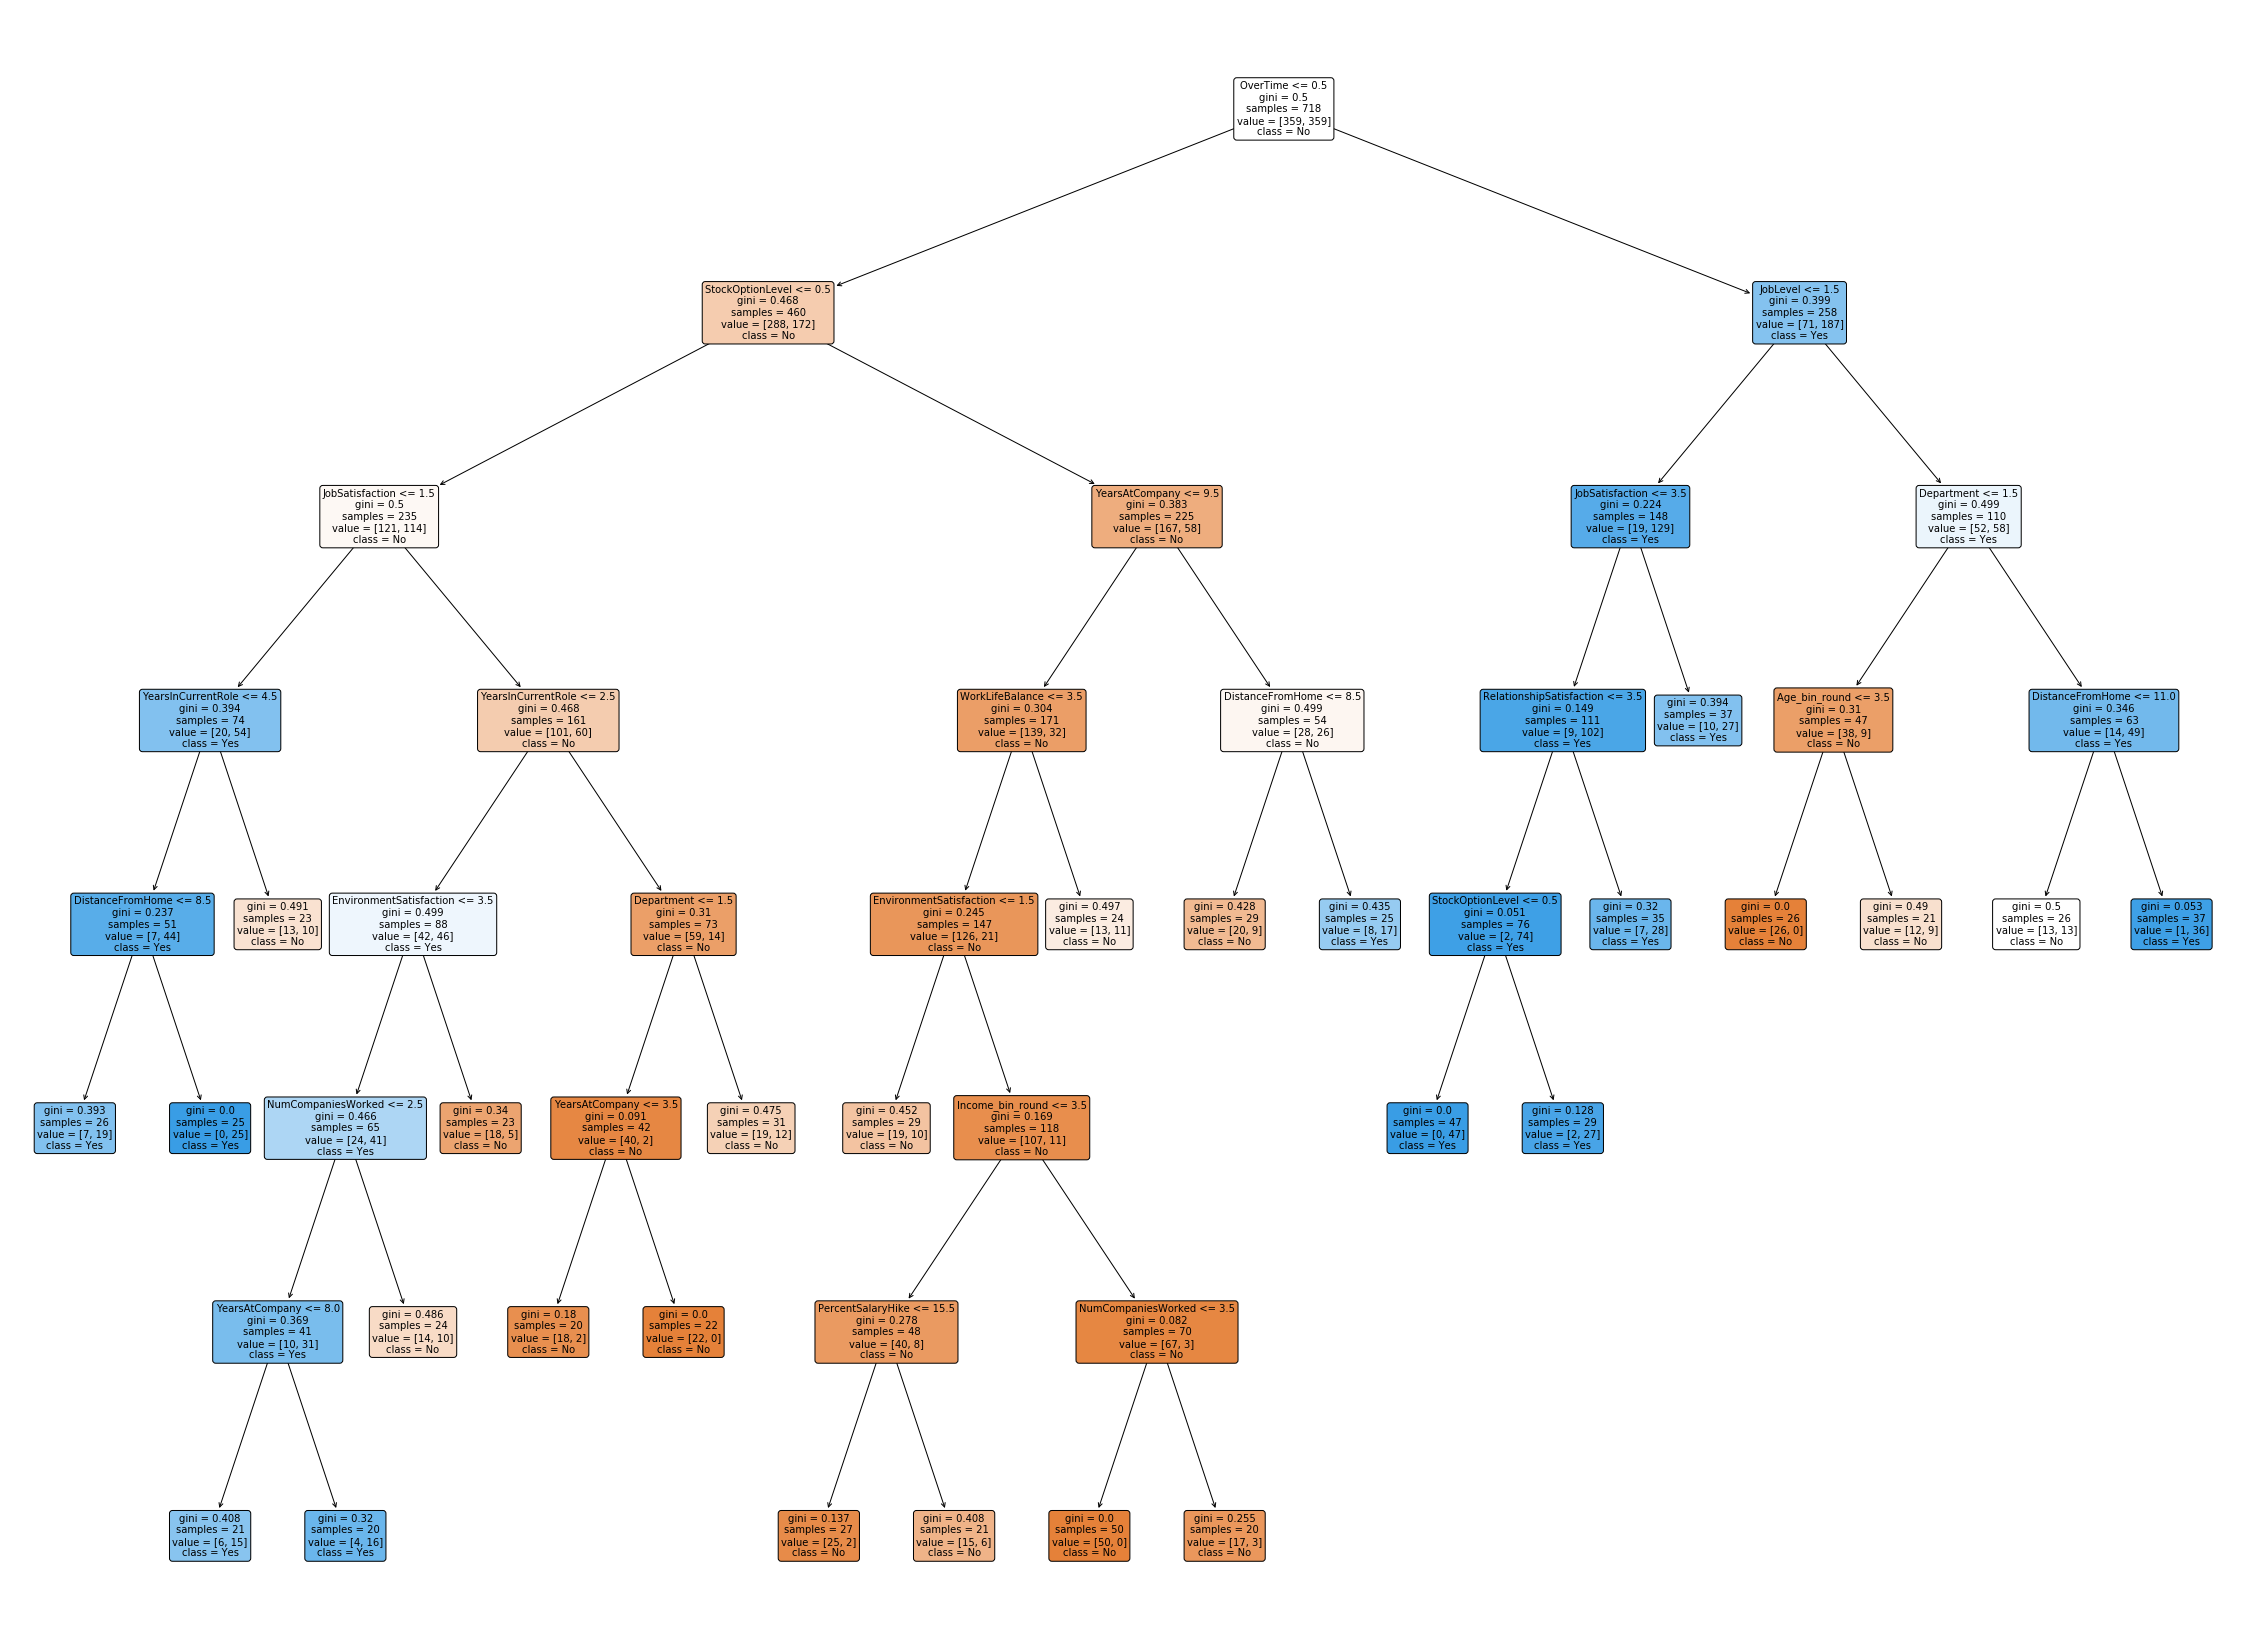

In [64]:
import pydotplus 
from IPython.display import Image  
from sklearn.tree import export_graphviz

fig, ax = plt.subplots(figsize=(40, 30))

tree.plot_tree(clf_dt, feature_names= attributes, class_names=['No', 'Yes'], 
               filled=True, rounded=True,  
                impurity= True , fontsize = 10)

dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         feature_names=attributes,  
                         class_names=['No', 'Yes'],  
                          filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
plt.show()
#Image(graph.create_png())


### Accuracy 

In [25]:
y_pred = clf_dt.predict(X_train)

In [26]:
y_pred_val = clf_dt.predict(X_val)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

##### TRAINING SET 

In [28]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.7952646239554317
F1-score [0.81032258 0.77760968]


In [29]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.75      0.87      0.81       359
         Yes       0.85      0.72      0.78       359

    accuracy                           0.80       718
   macro avg       0.80      0.80      0.79       718
weighted avg       0.80      0.80      0.79       718



In [30]:
confusion_matrix(y_train, y_pred)

array([[314,  45],
       [102, 257]], dtype=int64)

##### VALIDATION SET 

In [31]:
print('Accuracy %s' % accuracy_score(y_val, y_pred_val))
print('F1-score %s' % f1_score(y_val, y_pred_val, average=None))
print(classification_report(y_val, y_pred_val))
confusion_matrix(y_val, y_pred_val)

Accuracy 0.7666666666666667
F1-score [0.78294574 0.74774775]
              precision    recall  f1-score   support

          No       0.73      0.84      0.78       120
         Yes       0.81      0.69      0.75       120

    accuracy                           0.77       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.77      0.77      0.77       240



array([[101,  19],
       [ 37,  83]], dtype=int64)

### Confusion Matrix

In [32]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[314  45]
 [102 257]]
Normalized confusion matrix
[[0.87465181 0.12534819]
 [0.28412256 0.71587744]]


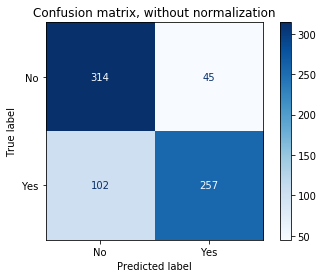

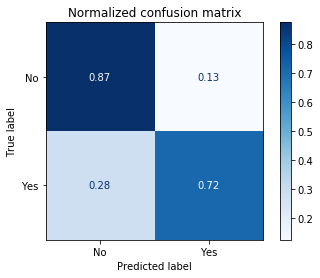

In [33]:
#CONFUSION MATRIX TRAINING SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_dt, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[101  19]
 [ 37  83]]
Normalized confusion matrix
[[0.84166667 0.15833333]
 [0.30833333 0.69166667]]


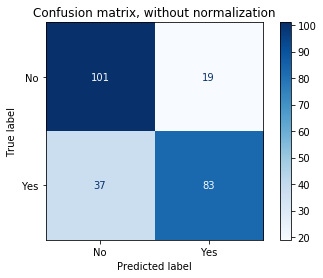

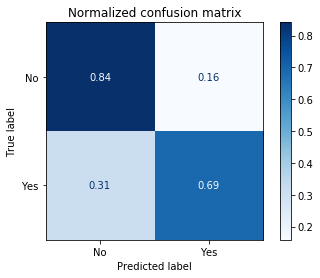

In [34]:
#CONFUSION MATRIX VALIDATION SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_dt, X_val, y_val,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### ROC curves 

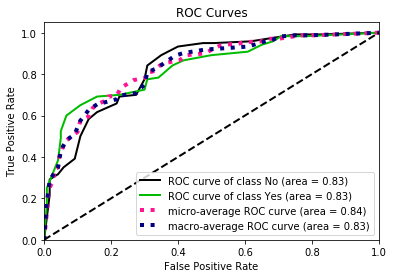

In [35]:
#In validation set

from scikitplot.metrics import plot_roc

y_score = clf_dt.predict_proba(X_val)
plot_roc(y_val, y_score)


In [36]:
from sklearn.preprocessing import LabelBinarizer

In [37]:
lb = LabelBinarizer()
lb.fit(y_val)
lb.fit(y_pred_val)
lb.classes_.tolist()


['No', 'Yes']

In [38]:
bina_y_val = lb.transform(y_val)
bina_y_pred = lb.transform(y_pred_val)
fpr, tpr, _ = roc_curve(bina_y_val, bina_y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(bina_y_val, bina_y_pred, average=None)
roc_auc

0.7666666666666667


0.7666666666666667

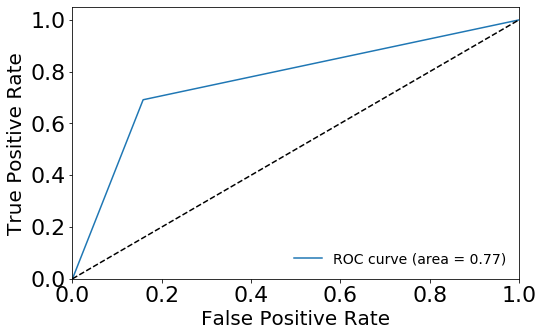

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### Cross Validation Score

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score(clf_dt, X_train_or, y_train_or, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores_f1 = cross_val_score(clf_dt, X_train_or, y_train_or, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores_f1.mean(), scores_f1.std() * 2))

Accuracy: 0.8467 (+/- 0.03)
F1-score: 0.6435 (+/- 0.09)


In [42]:
scores

array([0.86062718, 0.8466899 , 0.81881533, 0.86062718])

In [43]:
scores_f1

array([0.67460317, 0.59053178, 0.6056859 , 0.70326716])

### Learning curve

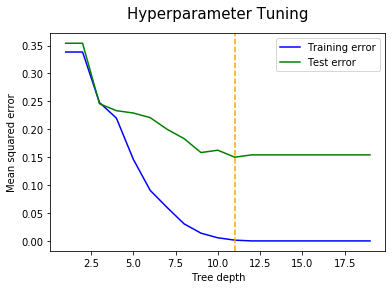

In [44]:
from sklearn.metrics import mean_squared_error as mse

bina_y = lb.transform(y_train_or)
bina_y_train = lb.transform(y_train)

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_1.fit(X_train, bina_y_train)
    training_error.append(mse(bina_y_train, model_1.predict(X_train)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_2.fit(X_train, bina_y_train)
    testing_error.append(mse(bina_y_val, model_2.predict(X_val)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Test error')
plt.xlabel('Tree depth')
plt.axvline(x=11, color='orange', linestyle='--')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()


# Random  Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [10, 15, 20, 30, 50, 100, 150],
              'min_samples_leaf': [5, 10, 15, 20, 30, 50, 100, 150],
              'criterion': ['gini', 'entropy'],}

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, class_weight=None)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100, cv=4)
random_search.fit(X_train, y_train)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.850 (std: 0.021)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 41, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.843 (std: 0.010)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.830 (std: 0.022)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 44, 'criterion': 'entropy'}



In [46]:
clf_rf= RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                               min_samples_split=10, min_samples_leaf=5, class_weight=None)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_val)
y_pred_tr = clf_rf.predict(X_train)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()



print('Test Accuracy %s' % accuracy_score(y_val, y_pred))
print('Test F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))
confusion_matrix(y_val, y_pred)

Train Accuracy 0.9554317548746518
Train F1-score [0.95604396 0.95480226]

Test Accuracy 0.8458333333333333
Test F1-score [0.85140562 0.83982684]
              precision    recall  f1-score   support

          No       0.82      0.88      0.85       120
         Yes       0.87      0.81      0.84       120

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



array([[106,  14],
       [ 23,  97]], dtype=int64)

Confusion matrix, without normalization
[[348  11]
 [ 21 338]]
Normalized confusion matrix
[[0.96935933 0.03064067]
 [0.05849582 0.94150418]]


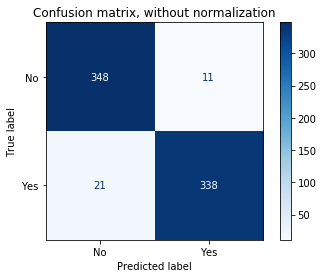

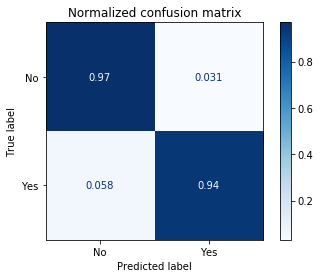

In [47]:
#CONFUSION MATRIX TRAIN
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

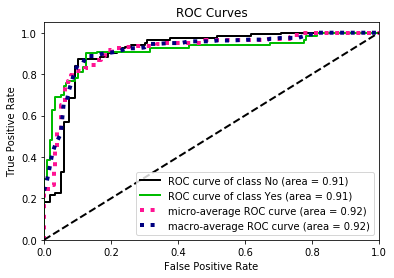

In [48]:
y_score_rf = clf_rf.predict_proba(X_val)
plot_roc(y_val, y_score_rf)

In [49]:
b_y_val = lb.transform(y_val)
b_y_pred = lb.transform(y_pred)
fpr, tpr, _ = roc_curve(b_y_val, b_y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(b_y_val, b_y_pred, average=None)
roc_auc

0.8458333333333333


0.8458333333333333

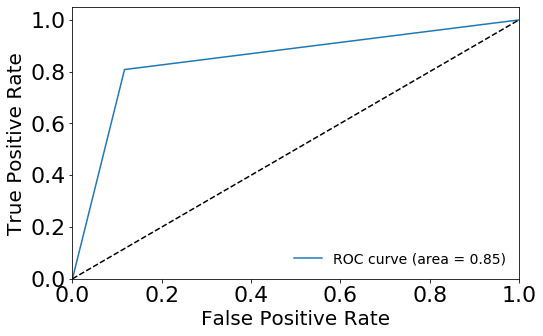

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [51]:
scores = cross_val_score(clf_rf, X_train, y_train, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores_f1 = cross_val_score(clf_rf, X_train, y_train, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores_f1.mean(), scores_f1.std() * 2))

Accuracy: 0.8385 (+/- 0.03)
F1-score: 0.8492 (+/- 0.04)


In [52]:
scores

array([0.83333333, 0.82777778, 0.8603352 , 0.83240223])

In [53]:
scores_f1

array([0.84995832, 0.84375   , 0.87662907, 0.82627344])

# knn

In [54]:
from sklearn.neighbors import KNeighborsClassifier

The optimal number of neighbors is  1 


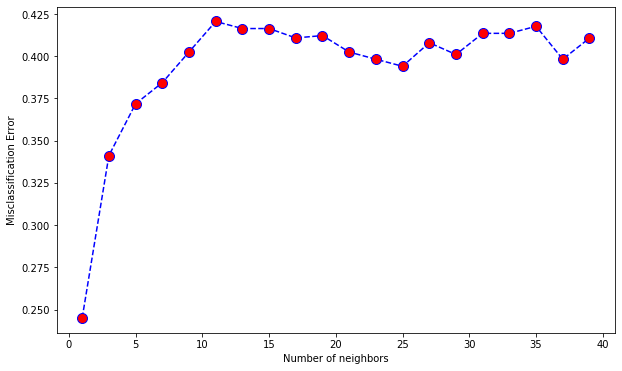

In [55]:
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  

# perform 10 fold cross validation
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(knn, X_train, y_train, cv = 4, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show() 

In [56]:
clf_kn = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform') #'distance' -> n= 8 
clf_kn.fit(X_train,y_train)

scores = cross_val_score(clf_kn, X_train_or, y_train_or, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_kn, X_train_or, y_train_or, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8380 (+/- 0.01)
F1-score: 0.4756 (+/- 0.05)


Confusion matrix, without normalization
[[244 115]
 [118 241]]
Normalized confusion matrix
[[0.67966574 0.32033426]
 [0.32869081 0.67130919]]


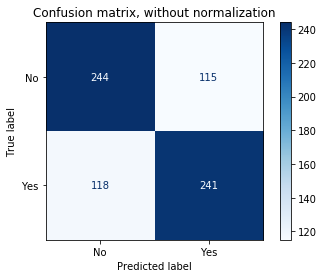

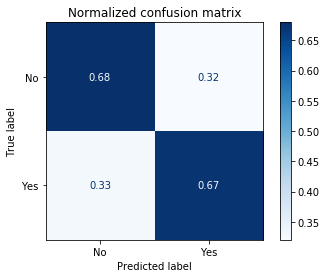

In [57]:
#CONFUSION MATRIX TRAIN
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[82 38]
 [59 61]]
Normalized confusion matrix
[[0.68333333 0.31666667]
 [0.49166667 0.50833333]]


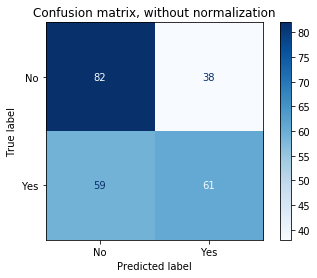

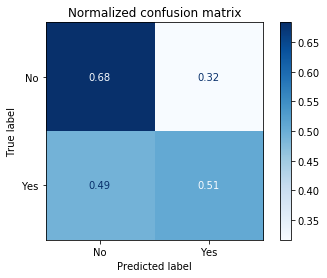

In [58]:
#CONFUSION MATRIX VALIDATION SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_val, y_val,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Testing Decision Tree on Test set

In [59]:
y_pred_or = clf_rf.predict(X_train_or)

In [60]:
y_pred_test = clf_rf.predict(X_test)

In [61]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_test))
print('F1-score %s' % f1_score(y_test, y_pred_test, average=None))

Accuracy 0.8125
F1-score [0.88311688 0.52631579]


In [62]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_test))
print('F1-score %s' % f1_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

Accuracy 0.8125
F1-score [0.88311688 0.52631579]
              precision    recall  f1-score   support

          No       0.92      0.85      0.88       240
         Yes       0.45      0.62      0.53        48

    accuracy                           0.81       288
   macro avg       0.69      0.74      0.70       288
weighted avg       0.84      0.81      0.82       288



array([[204,  36],
       [ 18,  30]], dtype=int64)